# Datos de NHANES del periodo 2013-2014

### Librerias

In [2]:
import janitor
import nhanes.load
import numpy as np
import pandas as pd
import missingno

### Importar Funciones Personalizadas

In [3]:
%run utils2.ipynb

### Cargar datos de NHANES

In [10]:
# cantidad de filas a mostrar en el notebook
pd.set_option('display.max_rows', 10)

In [11]:
# obtener los datos del periodo 2013 - 2014
(
    nhanes.load.load_NHANES_data(year='2017-2018')
)

,GeneralHealthCondition,EverBreastfedOrFedBreastmilk,AgeStoppedBreastfeedingdays,AgeFirstFedFormuladays,AgeStoppedReceivingFormuladays,AgeStartedOtherFoodbeverage,AgeFirstFedMilkdays,TypeOfMilkFirstFedWholeMilk,TypeOfMilkFirstFed2Milk,TypeOfMilkFirstFed1Milk,...,DaysSmokedCigsDuringPast30Days,AvgCigarettesdayDuringPast30Days,TriedToQuitSmoking,TimesStoppedSmokingCigarettes,HowLongWereYouAbleToStopSmoking,UnitOfMeasureDayweekmonthyear_2_SMQ,CurrentSelfreportedHeightInches,CurrentSelfreportedWeightPounds,TriedToLoseWeightInPastYear,TimesLost10LbsOrMoreToLoseWeight
SEQN,,,,,,,,,,,,,,,,,,,,,
93703.0,NaN,1.0,273.0,1.0,365.0,152.0,365.0,Whole or regular milk,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93704.0,NaN,1.0,60.0,3.0,365.0,126.0,365.0,Whole or regular milk,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93705.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,63.0,165.0,0.0,11 times or more
93706.0,Very good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,68.0,145.0,0.0,Never
93707.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102952.0,Very good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117.0,0.0,Never
102953.0,Fair or,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,65.0,218.0,0.0,Never
102954.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,66.0,150.0,0.0,Never


In [12]:
# modificar nombres de las columnas con separadores '_'

nhanes_raw_df = (
    nhanes.load.load_NHANES_data(year='2017-2018')
    .clean_names(case_type = 'snake')
)

nhanes_raw_df

,general_health_condition,ever_breastfed_or_fed_breastmilk,age_stopped_breastfeedingdays,age_first_fed_formuladays,age_stopped_receiving_formuladays,age_started_other_foodbeverage,age_first_fed_milkdays,type_of_milk_first_fed_whole_milk,type_of_milk_first_fed2_milk,type_of_milk_first_fed1_milk,...,days_smoked_cigs_during_past30_days,avg_cigarettesday_during_past30_days,tried_to_quit_smoking,times_stopped_smoking_cigarettes,how_long_were_you_able_to_stop_smoking,unit_of_measure_dayweekmonthyear_2_smq,current_selfreported_height_inches,current_selfreported_weight_pounds,tried_to_lose_weight_in_past_year,times_lost10_lbs_or_more_to_lose_weight
SEQN,,,,,,,,,,,,,,,,,,,,,
93703.0,NaN,1.0,273.0,1.0,365.0,152.0,365.0,Whole or regular milk,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93704.0,NaN,1.0,60.0,3.0,365.0,126.0,365.0,Whole or regular milk,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93705.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,63.0,165.0,0.0,11 times or more
93706.0,Very good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,68.0,145.0,0.0,Never
93707.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102952.0,Very good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117.0,0.0,Never
102953.0,Fair or,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,65.0,218.0,0.0,Never
102954.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,66.0,150.0,0.0,Never


### Seleccion de variables para el Analisis

In [13]:
# Seleccion de variables para el analisis

nhanes_df = (
    nhanes_raw_df
    .select_columns(
        'marital_status',
        'gender',
        'age_in_years_at_screening',
        'ever_used_marijuana_or_hashish',
        'how_healthy_is_the_diet',
        'how_often_do_you_feel_depressed',
        'weight_kg',
        'blood_mercury_total_ugl'
    )   # cambiamos el nombre de las columnas 
    .rename_columns(
        {
            'age_in_years_at_screening':'age',
            'ever_used_marijuana_or_hashish':'used_herb',
            'how_healthy_is_the_diet':'healthy_diet',
            'how_often_do_you_feel_depressed':'level_depression',
            'blood_mercury_total_ugl':'blood_mercury'
        }
    )   # sustituir valores que representan missing por NaN
    .replace(
        {
            'weight_kg':{
                9999:np.nan,
                7777:np.nan
            },
            'blood_mercury':{
                9999:np.nan,
                7777:np.nan
            }
        }
    )   # ordenar las variables segun su cantidad de valores faltantes
    .missing.sort_variables_by_missingness()
)

nhanes_df

,used_herb,marital_status,level_depression,healthy_diet,blood_mercury,weight_kg,gender,age
SEQN,,,,,,,,
93703.0,NaN,NaN,NaN,NaN,NaN,13.7,Female,2.0
93704.0,NaN,NaN,NaN,NaN,0.47,13.9,Male,2.0
93705.0,NaN,Divorced,1.0,Good,1.07,79.5,Female,66.0
93706.0,0.0,NaN,0.0,Very good,10.64,66.3,Male,18.0
93707.0,NaN,NaN,NaN,NaN,0.20,45.4,Male,13.0
...,...,...,...,...,...,...,...,...
102952.0,NaN,Married,0.0,Excellent,0.65,49.0,Female,70.0
102953.0,0.0,Separated,1.0,Poor,0.62,97.4,Male,42.0
102954.0,0.0,Never married,0.0,Good,2.08,69.1,Female,41.0


### Estadistica basica de valores faltantes por variable 

In [7]:
nhanes_df.missing.missing_variable_summary()

,variable,n_missing,n_cases,pct_missing
0,used_herb,5167,8366,61.761893
1,marital_status,3106,8366,37.126464
2,level_depression,2926,8366,34.974898
3,healthy_diet,2540,8366,30.360985
4,blood_mercury,853,8366,10.196032
5,weight_kg,124,8366,1.482190
6,gender,0,8366,0.000000
7,age,0,8366,0.000000


El porcentaje de valores faltantes en la variable Peso es del 1% por lo que eliminamos las observaciones con missing en Peso


### Eliminacion de registros con valores faltantes

In [15]:
nhanes_df = (
    nhanes_df
    .dropna(
        subset=['weight_kg'], # variable con valores faltantes
        how='any'   # elimina a cualquier registro con missing para la variable Peso
    )
)

In [16]:
nhanes_df

,used_herb,marital_status,level_depression,healthy_diet,blood_mercury,weight_kg,gender,age
SEQN,,,,,,,,
93703.0,NaN,NaN,NaN,NaN,NaN,13.7,Female,2.0
93704.0,NaN,NaN,NaN,NaN,0.47,13.9,Male,2.0
93705.0,NaN,Divorced,1.0,Good,1.07,79.5,Female,66.0
93706.0,0.0,NaN,0.0,Very good,10.64,66.3,Male,18.0
93707.0,NaN,NaN,NaN,NaN,0.20,45.4,Male,13.0
...,...,...,...,...,...,...,...,...
102952.0,NaN,Married,0.0,Excellent,0.65,49.0,Female,70.0
102953.0,0.0,Separated,1.0,Poor,0.62,97.4,Male,42.0
102954.0,0.0,Never married,0.0,Good,2.08,69.1,Female,41.0


### Tipos de valores de cada variable

In [17]:
nhanes_df.dtypes

used_herb           float64
marital_status       object
level_depression    float64
healthy_diet         object
blood_mercury       float64
weight_kg           float64
gender               object
age                 float64
dtype: object

Las variables Edad y nivel de depresion son de tipo float. Pueden convertirse en tipo entero para mayor comdidad a la hora de procesarlos. Sin embargo, al tener valores faltantes no es posible convertirlo. Espo ello, que debemos primero tratar los missing

### Visualizar los valores faltantes del dataframe

<AxesSubplot:>

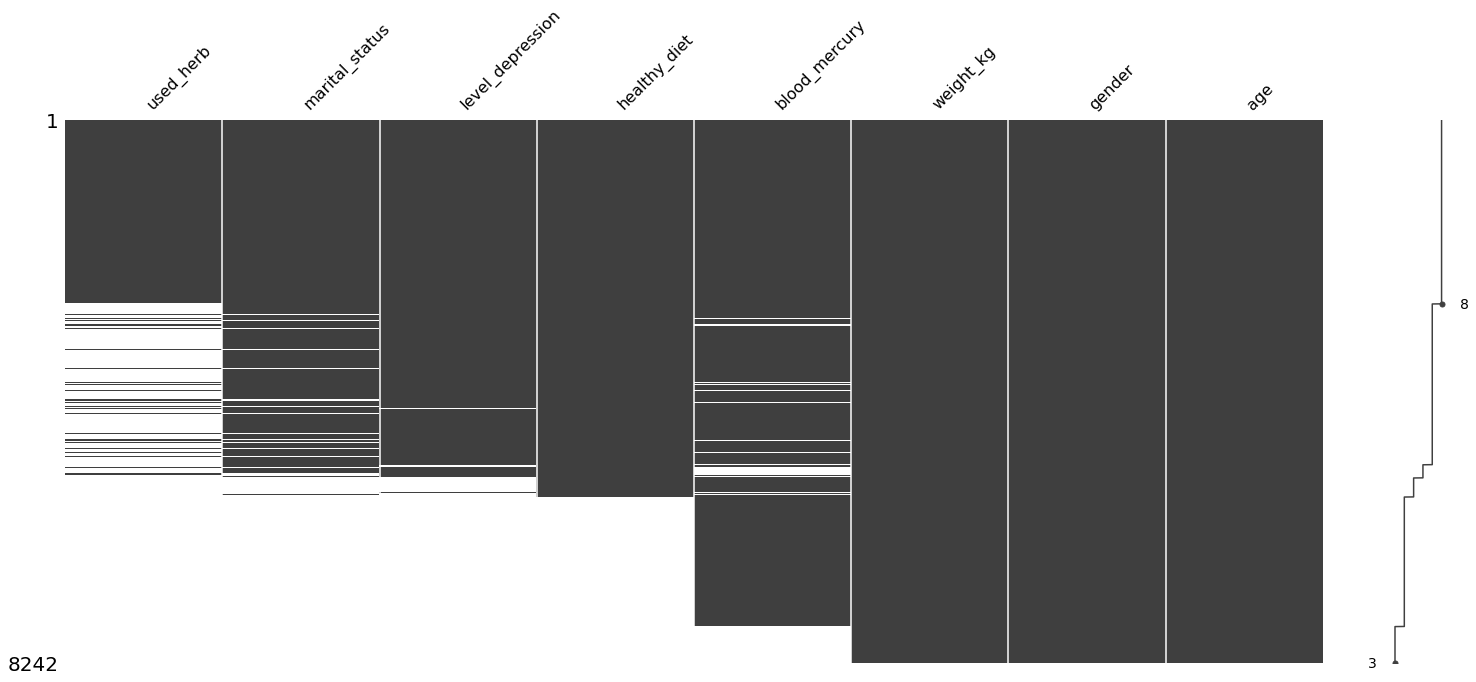

In [20]:
(
    nhanes_df
    .missing.sort_variables_by_missingness()    # ordena variables por numero de missing
    .pipe(missingno.matrix, sort = 'descending') 
)

Tenemos una franja de valores faltantes entre 5 variables lo que indica que podrian estar relacionadas. Utilizamos un grafico de Upsetplot para determinar si existe alguna relacion entre las variables. 

### Grafico Upsetplot 

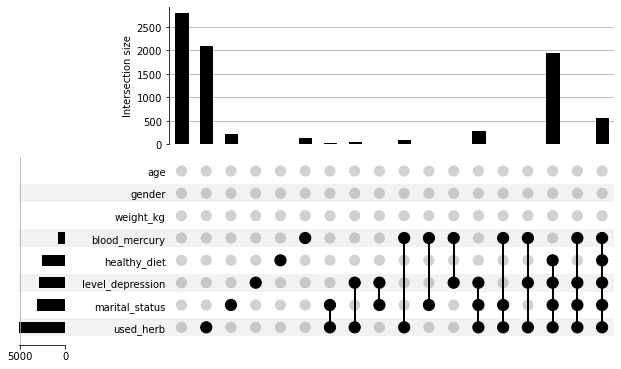

In [22]:
(
    nhanes_df
    .missing.sort_variables_by_missingness()
    .missing.missing_upsetplot()
);